In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import dask.dataframe as ddd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<h1>Работа с данными</h1>

In [3]:
#Прочитаем все данные. Кодировка изза кириллицы. 
#Изменения были сделаны в Excel, чтобы файл был читаем. 
#Я их оставлю в репозиторие
train_df = pd.read_csv('credit_train.csv', encoding='windows-1251')
test_df = pd.read_csv('credit_test.csv', encoding='windows-1251')
train_df.head(5)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,additional
0,1,M,48,MAR,UMN,59998,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0
1,2,F,28,MAR,UMN,10889,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0
2,3,M,32,MAR,SPC,10728,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0
3,4,F,27,DIV,SPC,12009,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,9
4,5,M,45,MAR,SPC,16908,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,89


In [4]:
#В csv был столбец значений после credit_sum. я предположил что это дробная часть для credit_sum -> суммируем их:
train_df['credit_sum'] = train_df['credit_sum'] + (train_df['additional'] / 100)
test_df['credit_sum'] = test_df['credit_sum'] + (test_df['additional'] / 100)

train_df.head(5)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,additional
0,1,M,48,MAR,UMN,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,9
4,5,M,45,MAR,SPC,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,89


In [5]:
train_df = train_df.drop(['additional'], axis=1)
test_df = test_df.drop(['additional'], axis=1)
train_df.head(1)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,59998.0,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0


In [6]:
train_df.info()
print('='*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170746 non-null  int64  
 3   marital_status        170746 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170746 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170746 non-null  int64  
 9   education             170746 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170745 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [7]:
#Выведем категориальные данные
print(train_df.select_dtypes(include=['object']).columns.tolist())
#Выведем все остальное
print('=' * 40)
train_df.select_dtypes(exclude=['object']).columns.tolist()

['gender', 'marital_status', 'job_position', 'education', 'living_region']


['client_id',
 'age',
 'credit_sum',
 'credit_month',
 'tariff_id',
 'score_shk',
 'monthly_income',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

In [8]:
train_df.describe()

,client_id,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170745.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497283,26095.047799,10.980749,1.323900,469455.624911,40138.288354,2.107308,0.046070,0.176028
std,49290.268869,10.546008,16234.794320,3.536698,0.235813,124253.077942,25044.205336,1.777128,0.211548,0.380845
min,1.000000,18.000000,2736.000000,3.000000,1.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,14908.000000,10.000000,1.100000,379495.000000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,21229.000000,10.000000,1.320000,461599.000000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,32068.000000,12.000000,1.600000,552396.000000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,200000.000000,36.000000,1.960000,978480.000000,950000.000000,21.000000,3.000000,1.000000


In [9]:
#рассмотрим категориальные данные
#Мы видим что:
#Количество мужчин и женщин почти одинаково (мужчины 51%)
#Семейных положений 5 - в основном женатые - 55% и тд.
train_df.describe(include=['O'])

,gender,marital_status,job_position,education,living_region
count,170746,170746,170746,170746,170554
unique,2,5,18,5,301
top,F,MAR,SPC,SCH,ОБЛ МОСКОВСКАЯ
freq,88697,93956,134680,87539,12228


<h1>Поиск корреляций</h1>

In [10]:
#Сравнение категориальных данных
#['gender', 'marital_status', 'job_position', 'education', 'living_region']
print(train_df[['gender', 'open_account_flg']].groupby(['gender'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False))


  gender  open_account_flg
1      M          0.193555
0      F          0.159814


In [11]:
print(train_df[['marital_status', 'open_account_flg']].groupby(['marital_status'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False))

  marital_status  open_account_flg
4            WID          0.211799
3            UNM          0.211241
0            CIV          0.201621
1            DIV          0.182086
2            MAR          0.152923


In [12]:
print(train_df[['job_position', 'open_account_flg']].groupby(['job_position'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False))
#Как и стоило ожидать: более благоустроенные люди имеют малый показатель

   job_position  open_account_flg
8           ONB          1.000000
6           INV          0.800000
11          PNS          0.500000
2           BIU          0.365079
9           PNA          0.362552
7           NOR          0.361266
10          PNI          0.307692
0           ATP          0.289144
5           INP          0.278008
4           HSK          0.250000
15          WOI          0.238636
12          PNV          0.225000
17          WRP          0.209091
14          UMN          0.188978
16          WRK          0.184451
13          SPC          0.166342
1           BIS          0.158290
3           DIR          0.148000


In [13]:
print(train_df[['education', 'open_account_flg']].groupby(['education'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False))

  education  open_account_flg
0       ACD          0.233645
3       SCH          0.205120
2       PGR          0.191150
4       UGR          0.184790
1       GRD          0.139543


In [14]:
df_of_living_region_observe = train_df[['living_region', 'open_account_flg']].groupby(['living_region'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False)
df_of_living_region_observe.head(10)
# df_of_living_region_observe.tail(10)

,living_region,open_account_flg
194,ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,1.0
179,ОБЛ.РОСТОВСКАЯ,1.0
40,Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ,1.0
39,Г.МОСКВА,1.0
89,КРАЙ.ПЕРМСКИЙ,1.0
88,КРАЙ. СТАВРОПОЛЬСКИЙ,1.0
68,КЕМЕРОВСКАЯ,1.0
86,КРАЙ. КРАСНОЯРСКИЙ,1.0
268,ТОМСКАЯ,1.0
57,КАЛМЫКИЯ,1.0


<p1>Поиск корреляций путём визуализации данных</p1>

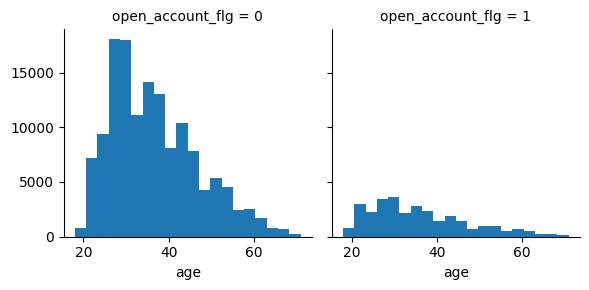

In [15]:
g = sns.FacetGrid(train_df, col='open_account_flg')
g.map(plt.hist, 'age', bins=20)

#Наблюдается резкое выделение (положительный показатель) при наступлении взрословго возраста
#А также спад после 45 лет
#Имеет смысл создания возрастных групп

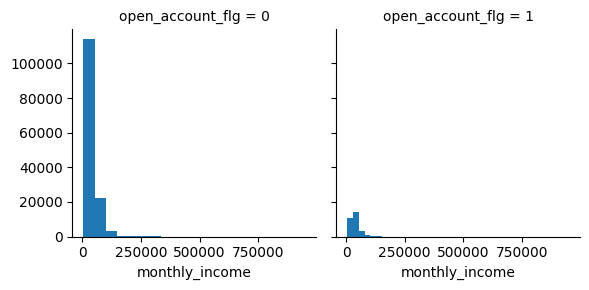

In [16]:
g = sns.FacetGrid(train_df, col='open_account_flg')
g.map(plt.hist, 'monthly_income', bins=20)

#Люди с большим доходом менее охотно берут кредит


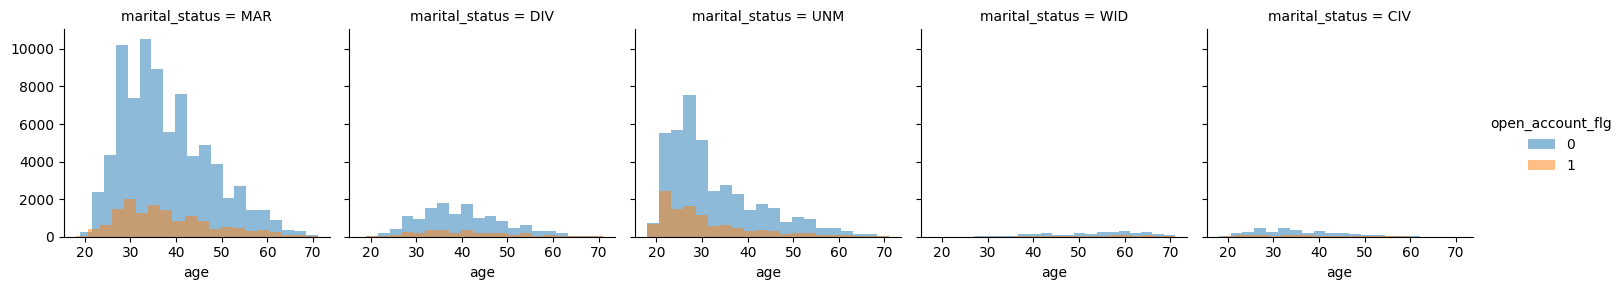

In [17]:
grid = sns.FacetGrid(train_df, col='marital_status', hue='open_account_flg', )
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

#Видно, что чаще всего открывают кредит люди начиная с 20 холостые и с 30 женатые

c:\Users\siyov\Anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\siyov\Anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


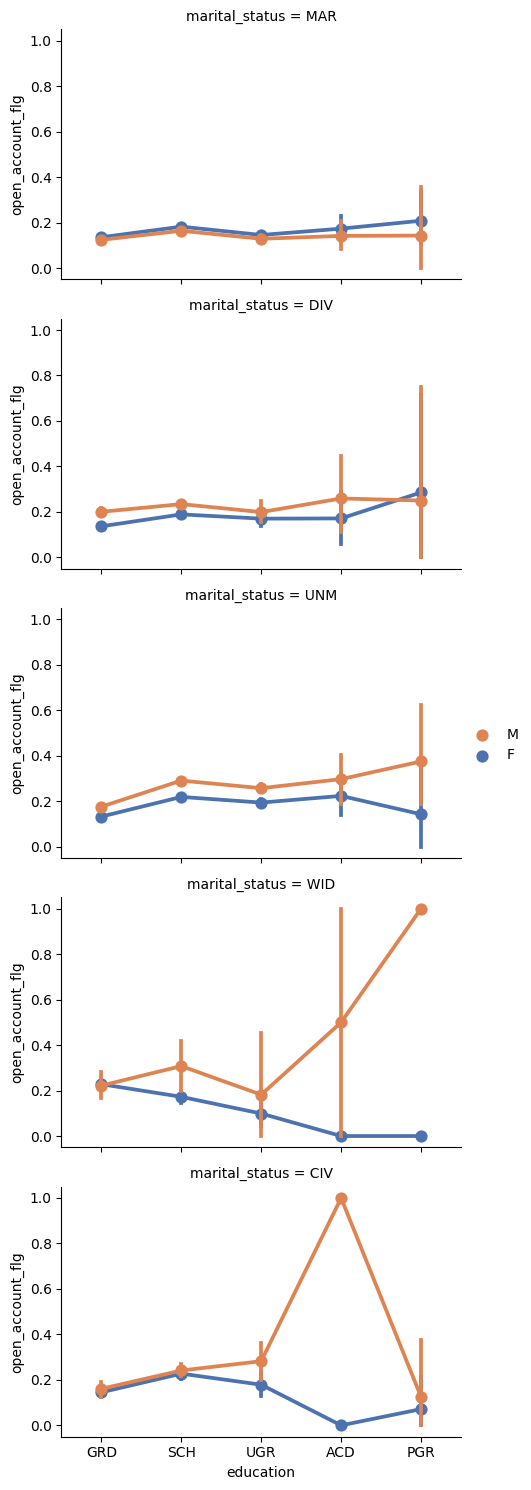

In [18]:
grid = sns.FacetGrid(train_df, row='marital_status', aspect=1.6)
grid.map(sns.pointplot, 'education', 'open_account_flg', 'gender', palette='deep')
grid.add_legend()
#В рассмотренных данных почти во всех точках мужчины берут кредит чаще женщин
#Овдовевшие мужчины магистры и ACD(академики ?) в гражданском браке часто берут кредит

<h1>Создадим новые признаки из существующих</h1>

In [19]:
combine = [train_df, test_df]
combine

[        client_id gender  age marital_status job_position  credit_sum  \
 0               1      M   48            MAR          UMN    59998.00   
 1               2      F   28            MAR          UMN    10889.00   
 2               3      M   32            MAR          SPC    10728.00   
 3               4      F   27            DIV          SPC    12009.09   
 4               5      M   45            MAR          SPC    16908.89   
 ...           ...    ...  ...            ...          ...         ...   
 170741     170742      F   27            UNM          SPC    64867.00   
 170742     170743      F   24            MAR          SPC    17640.00   
 170743     170744      F   31            UNM          SPC    27556.47   
 170744     170745      F   53            DIV          PNA     6189.00   
 170745     170746      M   49            MAR          SPC    12787.00   
 
         credit_month  tariff_id  score_shk education         living_region  \
 0                 10       1.6

In [20]:
# for dataset in train_df:
#     dataset['welfare'] = dataset.job_position.str.extract(' ([A-Za-z]+)\.', expand=False)
# train_df = train_df.drop(['welfare'], axis = 1)
# test_df = test_df.drop(['welfare'], axis = 1)
# test_df = test_df.drop(['Unnamed: 14'], axis = 1)
# test_df

In [21]:
for dataset in combine:
    dataset['welfare'] = dataset.job_position.str.extract('([A-ZA-Z]+)')

# pd.crosstab(train_df['welfare'], train_df['open_account_flg'])
print(train_df[['job_position', 'open_account_flg']].groupby(['job_position'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False))

   job_position  open_account_flg
8           ONB          1.000000
6           INV          0.800000
11          PNS          0.500000
2           BIU          0.365079
9           PNA          0.362552
7           NOR          0.361266
10          PNI          0.307692
0           ATP          0.289144
5           INP          0.278008
4           HSK          0.250000
15          WOI          0.238636
12          PNV          0.225000
17          WRP          0.209091
14          UMN          0.188978
16          WRK          0.184451
13          SPC          0.166342
1           BIS          0.158290
3           DIR          0.148000


In [22]:
#Сгруппируем род деятельности в 3 группы от высокого показателя до низкого

for dataset in combine:
    dataset['welfare'] = dataset['welfare'].replace(['ONB', 'INV', 'PNS', 'BIU', 'PNA', 'NOR'], 'HighRate')
    dataset['welfare'] = dataset['welfare'].replace(['PNI', 'ATP', 'INP', 'HSK', 'WOI', 'PNV', 'WRP'], 'AverageRate')
    dataset['welfare'] = dataset['welfare'].replace(['UMN', 'WRK', 'SPC', 'BIS', 'DIR'], 'LowRate')

In [23]:
train_df[['welfare', 'open_account_flg']].groupby(['welfare'], as_index=False).mean()

,welfare,open_account_flg
0,AverageRate,0.280566
1,HighRate,0.363409
2,LowRate,0.168179


In [24]:
train_df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,M,48,MAR,UMN,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,LowRate
1,2,F,28,MAR,UMN,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,LowRate
2,3,M,32,MAR,SPC,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,LowRate
3,4,F,27,DIV,SPC,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,LowRate
4,5,M,45,MAR,SPC,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,LowRate


In [25]:
welfare_mapping = {"LowRate" : 0, "AverageRate" : 1, "HighRate" : 2}
for dataset in combine:
    dataset['welfare'] = dataset['welfare'].map(welfare_mapping)
    dataset['welfare'] = dataset['welfare'].fillna(0)

train_df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,M,48,MAR,UMN,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,0


In [26]:
train_df = train_df.drop(['job_position', 'client_id'], axis=1)
test_df = test_df.drop(['job_position'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((170746, 14), (91940, 15))

<h1>Конвертация категориальных признаков</h1>

In [27]:
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {'F' : 0, 'M' : 1}).astype(int)

train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,48,MAR,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0
1,0,28,MAR,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0
2,1,32,MAR,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0
3,0,27,DIV,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,0
4,1,45,MAR,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,0


In [28]:
train_df['AgeBand'] = pd.cut(train_df['age'],5)
train_df[['AgeBand','open_account_flg']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='open_account_flg', ascending=True)

,AgeBand,open_account_flg
2,"(39.2, 49.8]",0.151951
1,"(28.6, 39.2]",0.162525
3,"(49.8, 60.4]",0.172945
0,"(17.947, 28.6]",0.210442
4,"(60.4, 71.0]",0.238624


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 28.6, 'age'] = 3
    dataset.loc[(dataset['age'] > 28.6) & (dataset['age'] <= 39.2), 'age'] = 1
    dataset.loc[(dataset['age'] > 39.2) & (dataset['age'] <= 49.8), 'age'] = 0
    dataset.loc[(dataset['age'] > 49.8) & (dataset['age'] <= 60.4), 'age'] = 2
    dataset.loc[ dataset['age'] > 60.4, 'age'] = 4
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare,AgeBand
0,1,0,MAR,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0,"(39.2, 49.8]"
1,0,3,MAR,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0,"(17.947, 28.6]"
2,1,1,MAR,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0,"(28.6, 39.2]"
3,0,3,DIV,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,0,"(17.947, 28.6]"
4,1,0,MAR,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,0,"(39.2, 49.8]"


In [30]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,0,MAR,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0,0
1,0,3,MAR,10889.00,6,1.1,248514,GRD,МОСКВА,43000.0,2.0,0.0,0,0
2,1,1,MAR,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0,0
3,0,3,DIV,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0,0
4,1,0,MAR,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0,0


In [31]:
train_df['SalaryBand'] = pd.cut(train_df['monthly_income'],3)
train_df[['SalaryBand','open_account_flg']].groupby(['SalaryBand'], as_index=False).mean().sort_values(by='SalaryBand', ascending=True)

,SalaryBand,open_account_flg
0,"(4055.0, 320000.0]",0.176061
1,"(320000.0, 635000.0]",0.109091
2,"(635000.0, 950000.0]",0.000000


In [32]:
for dataset in combine:    
    dataset.loc[ dataset['monthly_income'] <= 320000.0, 'monthly_income'] = 2
    dataset.loc[(dataset['monthly_income'] > 320000.0) & (dataset['monthly_income'] <= 635000.0), 'monthly_income'] = 1
    dataset.loc[ dataset['monthly_income'] > 635000.0, 'monthly_income'] = 0

In [33]:
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare,SalaryBand
0,1,0,MAR,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,2.0,1.0,1.0,0,0,"(4055.0, 320000.0]"
1,0,3,MAR,10889.00,6,1.1,248514,GRD,МОСКВА,2.0,2.0,0.0,0,0,"(4055.0, 320000.0]"
2,1,1,MAR,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,2.0,5.0,0.0,0,0,"(4055.0, 320000.0]"
3,0,3,DIV,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,2.0,2.0,0.0,0,0,"(4055.0, 320000.0]"
4,1,0,MAR,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,2.0,1.0,0.0,0,0,"(4055.0, 320000.0]"


In [34]:
train_df = train_df.drop(['SalaryBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,0,MAR,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,2.0,1.0,1.0,0,0
1,0,3,MAR,10889.00,6,1.1,248514,GRD,МОСКВА,2.0,2.0,0.0,0,0
2,1,1,MAR,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,2.0,5.0,0.0,0,0
3,0,3,DIV,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,2.0,2.0,0.0,0,0
4,1,0,MAR,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,2.0,1.0,0.0,0,0


In [35]:
freq_port = train_df.marital_status.dropna().mode()[0]
freq_port

'MAR'

In [36]:
for dataset in combine:
    dataset['marital_status'] = dataset['marital_status'].fillna(freq_port)
    
train_df[['marital_status', 'open_account_flg']].groupby(['marital_status'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False)

,marital_status,open_account_flg
4,WID,0.211799
3,UNM,0.211241
0,CIV,0.201621
1,DIV,0.182086
2,MAR,0.152923


In [37]:
for dataset in combine:
    dataset['marital_status'] = dataset['marital_status'].map( {'MAR': 0, 'DIV': 1, 'CIV': 2, 'UNM': 3, 'WID':4} ).astype(int)

train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,0,0,59998.00,10,1.6,770249,GRD,КРАСНОДАРСКИЙ КРАЙ,2.0,1.0,1.0,0,0
1,0,3,0,10889.00,6,1.1,248514,GRD,МОСКВА,2.0,2.0,0.0,0,0
2,1,1,0,10728.00,12,1.1,459589,SCH,ОБЛ САРАТОВСКАЯ,2.0,5.0,0.0,0,0
3,0,3,1,12009.09,12,1.1,362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,2.0,2.0,0.0,0,0
4,1,0,0,16908.89,10,1.1,421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,2.0,1.0,0.0,0,0


In [38]:
for dataset in combine:
    dataset['education'] = dataset['education'].fillna(freq_port)
    
train_df[['education', 'open_account_flg']].groupby(['education'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False)

,education,open_account_flg
0,ACD,0.233645
3,SCH,0.205120
2,PGR,0.191150
4,UGR,0.184790
1,GRD,0.139543


In [39]:
for dataset in combine:
    dataset['education'] = dataset['education'].map( {'GRD': 0, 'UGR': 1, 'PGR': 2, 'SCH': 3, 'ACD':4} ).astype(int)

train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare
0,1,0,0,59998.00,10,1.6,770249,0,КРАСНОДАРСКИЙ КРАЙ,2.0,1.0,1.0,0,0
1,0,3,0,10889.00,6,1.1,248514,0,МОСКВА,2.0,2.0,0.0,0,0
2,1,1,0,10728.00,12,1.1,459589,3,ОБЛ САРАТОВСКАЯ,2.0,5.0,0.0,0,0
3,0,3,1,12009.09,12,1.1,362536,0,ОБЛ ВОЛГОГРАДСКАЯ,2.0,2.0,0.0,0,0
4,1,0,0,16908.89,10,1.1,421385,3,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,2.0,1.0,0.0,0,0


In [40]:
freq_port1 = train_df.living_region.dropna().mode()[0]
freq_port1

for dataset in combine:
    dataset['living_region'] = dataset['living_region'].fillna(freq_port1)
    
train_df[['living_region', 'open_account_flg']].groupby(['living_region'], as_index=False).mean().sort_values(by='open_account_flg', ascending=False)

,living_region,open_account_flg
194,ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,1.0
179,ОБЛ.РОСТОВСКАЯ,1.0
40,Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ,1.0
39,Г.МОСКВА,1.0
89,КРАЙ.ПЕРМСКИЙ,1.0
...,...,...
56,КАЛИНИНГРАДСКАЯ ОБЛ.,0.0
50,ИНГУШЕТИЯ РЕСП,0.0
250,САХА /ЯКУТИЯ/,0.0
44,ДАЛЬНИЙ ВОСТОК,0.0


In [41]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_df['living_region'] = le.fit_transform(train_df.living_region.values)

In [42]:
test_df['living_region'] = le.fit_transform(test_df.living_region.values)

In [43]:
# test_df = test_df.drop(['Unnamed: 14'], axis=1)
test_df

,client_id,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,Unnamed: 14,welfare
0,170747,0,0,0,16558.00,10,1.10,370409,0,249,2,2.0,0.0,NaN,0
1,170748,1,1,0,7028.72,6,1.40,377281,3,122,2,3.0,0.0,NaN,0
2,170749,0,3,3,13019.00,10,1.60,538515,3,112,2,1.0,0.0,NaN,0
3,170750,0,0,0,9379.00,10,1.10,482520,0,119,2,0.0,0.0,NaN,0
4,170751,0,1,0,13990.00,6,1.43,485914,0,123,2,2.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91935,262682,1,0,0,10114.00,12,1.90,347262,3,217,2,1.0,0.0,NaN,0
91936,262683,1,1,3,14807.00,6,1.60,404430,3,113,2,0.0,0.0,NaN,0
91937,262684,0,3,0,19718.00,10,1.40,341982,0,171,2,1.0,0.0,NaN,0
91938,262685,1,3,3,22258.00,10,1.43,698764,3,115,2,NaN,NaN,NaN,0


In [44]:
train_df['SumBand'] = pd.cut(train_df['credit_sum'],4)
train_df[['SumBand','open_account_flg']].groupby(['SumBand'], as_index=False).mean().sort_values(by='SumBand', ascending=True)

,SumBand,open_account_flg
0,"(2538.736, 52052.0]",0.181837
1,"(52052.0, 101368.0]",0.119300
2,"(101368.0, 150684.0]",0.129630
3,"(150684.0, 200000.0]",0.071429


In [45]:
for dataset in combine:    
    dataset.loc[ dataset['credit_sum'] <= 52052.0, 'credit_sum'] = 3
    dataset.loc[(dataset['credit_sum'] > 52052.0) & (dataset['credit_sum'] <= 101368.0), 'credit_sum'] = 1
    dataset.loc[(dataset['credit_sum'] > 101368.0) & (dataset['credit_sum'] <= 150684.0), 'credit_sum'] = 2
    dataset.loc[ dataset['credit_sum'] > 150684.0, 'credit_sum'] = 0
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare,SumBand
0,1,0,0,1.0,10,1.6,770249,0,91,2.0,1.0,1.0,0,0,"(52052.0, 101368.0]"
1,0,3,0,3.0,6,1.1,248514,0,105,2.0,2.0,0.0,0,0,"(2538.736, 52052.0]"
2,1,1,0,3.0,12,1.1,459589,3,156,2.0,5.0,0.0,0,0,"(2538.736, 52052.0]"
3,0,3,1,3.0,12,1.1,362536,0,128,2.0,2.0,0.0,0,0,"(2538.736, 52052.0]"
4,1,0,0,3.0,10,1.1,421385,3,287,2.0,1.0,0.0,0,0,"(2538.736, 52052.0]"


In [46]:
train_df = train_df.drop(['SumBand'], axis=1)

In [47]:
train_df['ScoreBand'] = pd.cut(train_df['score_shk'],3)
train_df[['ScoreBand','open_account_flg']].groupby(['ScoreBand'], as_index=False).mean().sort_values(by='open_account_flg', ascending=True)

,ScoreBand,open_account_flg
0,"(-978.48, 326160.0]",0.145997
1,"(326160.0, 652320.0]",0.174880
2,"(652320.0, 978480.0]",0.227333


In [48]:
combine = [train_df, test_df]

In [49]:
for dataset in combine:    
    dataset.loc[dataset['score_shk'] < 326160, 'score_shk'] = 0
    dataset.loc[(dataset['score_shk'] > 326160) & (dataset['score_shk'] < 652320), 'score_shk'] = 1
    dataset.loc[dataset['score_shk'] > 652320, 'score_shk'] = 2
train_df.head()

,gender,age,marital_status,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,welfare,ScoreBand
0,1,0,0,1.0,10,1.6,2,0,91,2.0,1.0,1.0,0,0,"(652320.0, 978480.0]"
1,0,3,0,3.0,6,1.1,0,0,105,2.0,2.0,0.0,0,0,"(-978.48, 326160.0]"
2,1,1,0,3.0,12,1.1,1,3,156,2.0,5.0,0.0,0,0,"(326160.0, 652320.0]"
3,0,3,1,3.0,12,1.1,1,0,128,2.0,2.0,0.0,0,0,"(326160.0, 652320.0]"
4,1,0,0,3.0,10,1.1,1,3,287,2.0,1.0,0.0,0,0,"(326160.0, 652320.0]"


In [50]:
train_df = train_df.drop(['ScoreBand'], axis = 1)

In [51]:
test_df = test_df.drop(['Unnamed: 14'], axis = 1)

In [52]:
train_df = train_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [53]:
test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

<h1>Работа с мoделью</h1>
будем использовать несколько классификаторов
и регрессоров
в конце выберем наиболее устойчивый 
к данной задаче:

Logistic Regression

KNN or k-Nearest Neighbors

Naive Bayes classifier

Decision Tree

Random Forrest

In [54]:
X_train = train_df.drop("open_account_flg", axis=1)
Y_train = train_df["open_account_flg"]
X_test  = test_df.drop("client_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((170746, 13), (170746,), (91940, 13))

In [55]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.39

In [56]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

#Наши наблюдения на счет благосостояния были верны:
#Род деятельности имеет самый высокий положительный коэффициент

,Feature,Correlation
12,welfare,0.437070
6,education,0.281196
0,age,0.274691
11,open_account_flg,0.234653
3,credit_month,0.218842
2,credit_sum,0.119245
7,living_region,0.117588
1,marital_status,0.082728
10,overdue_credit_count,0.038821
4,tariff_id,0.013737


In [57]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.23

In [58]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.63

In [59]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.09

In [60]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.08

<h1>Оценка моделей</h1>
Несмотря на то, что Random Forest и Decision Tree показали одинаковый результат, мы отдадим предпочтение Random Forest изза частого переобучения на тестовой выборке у Decision Tree.

In [61]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,95.09
2,Random Forest,95.08
0,KNN,86.23
1,Logistic Regression,82.39
3,Naive Bayes,77.63


Лучший показатель оказался у Random Forest.
Хотя, на мой взгляд, лучше положиться на KNN изза слишком высокой точности в 95%, есть высокая вероятность переобучнеия.